In [55]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix , classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

### Loading Dataset

In [3]:
(X_train, y_train) , (X_test, y_test) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 27s 2us/step


### Plotting random sample from dataset

In [16]:
def plot_sample(X,y,index):
    print("The real label is", y[index] )
    plt.matshow(X[index])

The real label is 3


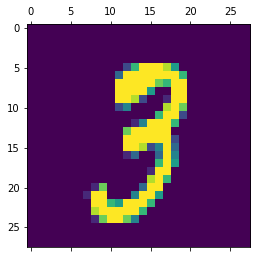

In [17]:
ridx=np.random.randint(0,y_train.shape[0])
plot_sample(X_train,y_train,ridx)

In [18]:
X_train = X_train / 255
X_test = X_test / 255

### Artificial Neural Network(ANN)

In [49]:
ann = models.Sequential([
        layers.Flatten(input_shape=(28,28,1)),
        layers.Dense(700, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

In [51]:
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [52]:
ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.5510 - accuracy: 0.86 - 14s 7ms/step - loss: 0.5502 - accuracy: 0.8613
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2650 - accuracy: 0.9246
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2132 - accuracy: 0.9396
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1796 - accuracy: 0.9493
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1550 - accuracy: 0.9560
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1353 - accuracy: 0.9618
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1202 - accuracy: 0.9658
Epoch 8/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1075 - accuracy: 0.9698
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0974 - accuracy: 0.9726
Epoch 10/10
1875/1875 [=======

In [53]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0992 - accuracy: 0.9703


[0.09923570603132248, 0.970300018787384]

In [54]:
y_pred=ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report for ANN: \n", classification_report(y_test, y_pred_classes))

Classification Report for ANN: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.96      0.98      0.97       982
           5       0.97      0.96      0.97       892
           6       0.98      0.97      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.98      0.95      0.96       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [57]:
def print_condufsion_matrix(y_test,y_predicted):
    confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
    plt.figure(figsize = (10,7))
    sn.heatmap(confusion_matrix, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

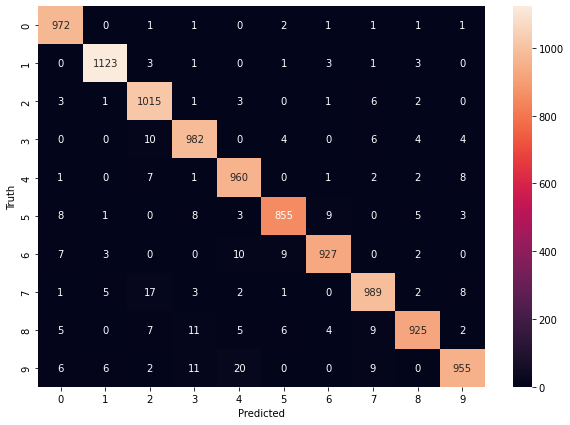

In [59]:
print_condufsion_matrix(y_test,y_pred_classes)

### Convolutional Neural Network

In [21]:
cnn = models.Sequential([
    layers.Conv2D(filters=28, kernel_size=(3, 3), activation='relu', input_shape=(28, 28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=56, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [22]:
cnn.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.5699 - accuracy: 0.8334
Epoch 2/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.1508 - accuracy: 0.9541
Epoch 3/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1040 - accuracy: 0.9683
Epoch 4/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0843 - accuracy: 0.9741
Epoch 5/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0728 - accuracy: 0.9774
Epoch 6/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0634 - accuracy: 0.9802
Epoch 7/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0571 - accuracy: 0.9822
Epoch 8/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0514 - accuracy: 0.9843
Epoch 9/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0473 - accuracy: 0.9856
Epoch 10/10
1875/1875 [==============================] - 49s 26m

In [24]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0441 - accuracy: 0.9857


[0.04413781687617302, 0.9857000112533569]

In [25]:
y_pred=cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report for CNN: \n", classification_report(y_test, y_pred_classes))

Classification Report for CNN: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
print_condufsion_matrix(y_test,y_pred_classes)

The predicted label is 7
The real label is 7


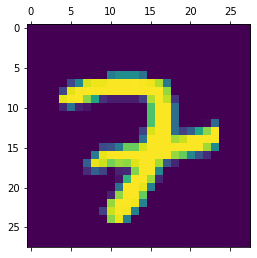

In [45]:
idx=np.random.randint(0,y_test.shape[0])
print("The predicted label is",y_pred_classes[idx] )
plot_sample(X_test,y_test,idx)